# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import chardet
with open('IMDb_dataset.csv', 'rb') as file:
    result = chardet.detect(file.read())
detected_encoding = result['encoding']
print(f"Detected Encoding: {detected_encoding}")

Detected Encoding: ISO-8859-1


In [3]:
df = pd.read_csv('IMDb_dataset.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Missing values

In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Percentage of missing values in each column

In [7]:
missing_count = df.isnull().sum()
total_count = len(df)
percentage_missing = (missing_count / total_count) * 100
percentage_missing

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

# Vizualizing missing values through Heatmap

<Axes: >

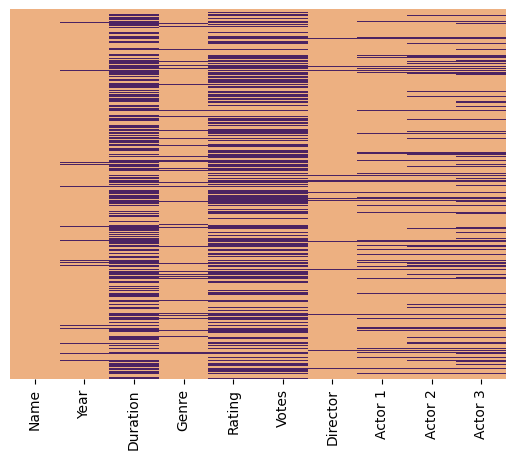

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='flare')

# Data cleaning : dropping all null values and duplicates

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5659, 10)

<Axes: >

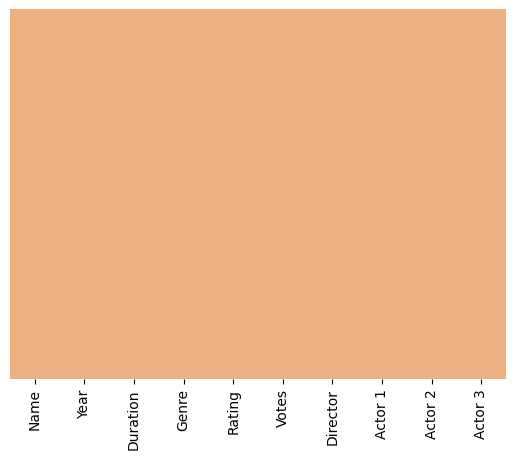

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='flare')

# Data type conversion of 'Votes'

In [14]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     4291 non-null   float64
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


In [16]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,NaN,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     4291 non-null   float64
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


# Data Preprocessing

In [18]:
df['Year']= df['Year'].str.strip('()').astype(int)
df['Duration']=df['Duration'].str.strip(' min')

In [19]:
df['Duration_copy']=df['Duration']
mask = df['Duration'].isnull()
random_values = np.random.randint(90, 181, size=mask.sum())  # Generate random numbers
df['Duration'][mask] = random_values
org_duration = df.loc[~df['Duration_copy'].isnull(), 'Duration_copy'].astype(int)
df['Duration'] = df['Duration'].astype(int)    

C:\Users\samri\AppData\Local\Temp\ipykernel_22132\1778978848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'][mask] = random_values


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5659 non-null   object 
 1   Year           5659 non-null   int32  
 2   Duration       5659 non-null   int32  
 3   Genre          5659 non-null   object 
 4   Rating         5659 non-null   float64
 5   Votes          4291 non-null   float64
 6   Director       5659 non-null   object 
 7   Actor 1        5659 non-null   object 
 8   Actor 2        5659 non-null   object 
 9   Actor 3        5659 non-null   object 
 10  Duration_copy  5659 non-null   object 
dtypes: float64(2), int32(2), object(7)
memory usage: 486.3+ KB


In [21]:
df.drop(columns=['Duration_copy'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     4291 non-null   float64
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 442.1+ KB


# Relation between Duration and Rating

In [22]:
# Calculating the correlation coefficient
correlation_coefficient = df['Duration'].corr(df['Rating'])

if correlation_coefficient > 0:
    impact = "positive"
elif correlation_coefficient < 0:
    impact = "negative"
else:
    impact = "no"
print(f"The correlation coefficient between Duration and Rating is {correlation_coefficient:.2f}.")
print(f"There is a {impact} impact of movie duration on its rating.")

The correlation coefficient between Duration and Rating is 0.00.
There is a positive impact of movie duration on its rating.


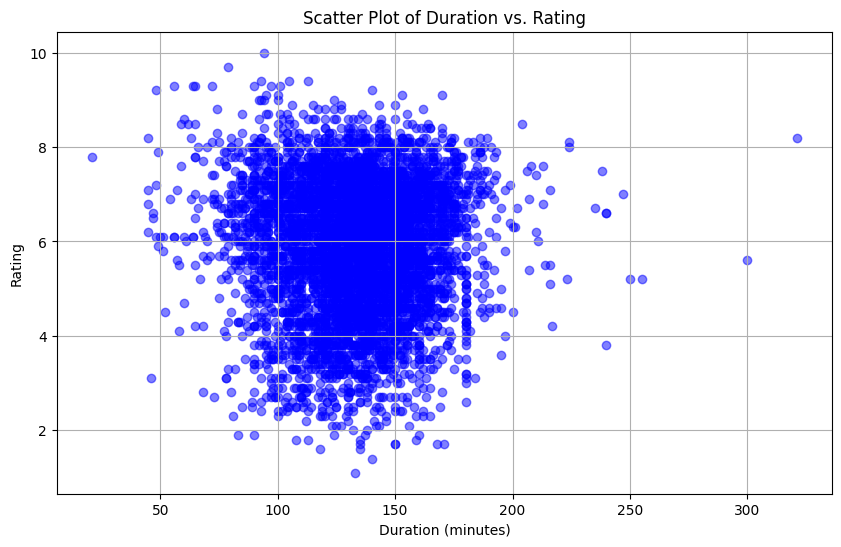

In [23]:
duration = df['Duration']
rating = df['Rating']
plt.figure(figsize=(10, 6))
plt.scatter(duration, rating, alpha=0.5, color='blue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Scatter Plot of Duration vs. Rating')
plt.grid(True)
plt.show()

# Average rating of the movies each year

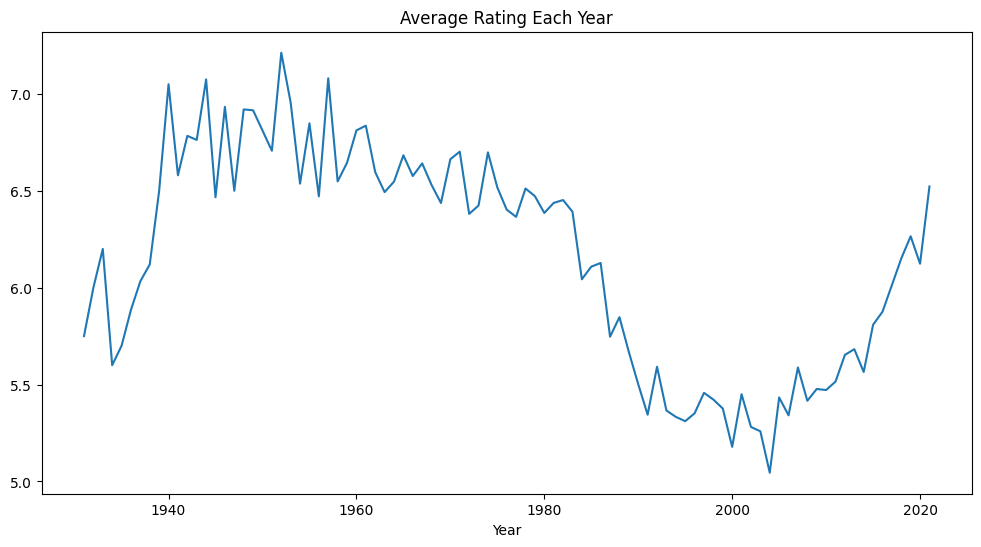

In [24]:
average_ratings_by_year = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, linestyle='-')
plt.title('Average Rating Each Year')
plt.xlabel('Year')
plt.show()

# Best Year with highest Rating : having maximum average rating is 1952

In [25]:
# Calculating the average rating for each year
average_ratings_by_year = df.groupby('Year')['Rating'].mean().reset_index()

# Finding the year with the maximum average rating
max_avg_rating_year = average_ratings_by_year.loc[average_ratings_by_year['Rating'].idxmax()]
print("Year with the Maximum Average Rating:")
print(max_avg_rating_year)

Year with the Maximum Average Rating:
Year      1952.0000
Rating       7.2125
Name: 21, dtype: float64


# Highest rated Movies Per Year and Top 10 Movies Overall

In [26]:
# Finding the top rated movies per year based on rating and count of votes
top_rated_movies_per_year = df.groupby('Year').apply(lambda x: x.nlargest(1, 'Rating')).reset_index(drop=True)

# Finding the top 10 movies overall based on rating and count of votes
top_ten_movies_overall = df.nlargest(10, 'Rating')

print("Top rated Movies Per Year:")
print(top_rated_movies_per_year[['Name', 'Year', 'Rating', 'Votes']])

print("\nTop 10 Movies Overall:")
print(top_ten_movies_overall[['Name', 'Year', 'Rating', 'Votes']])


Top rated Movies Per Year:
                      Name  Year  Rating  Votes
0   The Light of the World  1931     6.2  112.0
1               Indrasabha  1932     6.0   12.0
2                     Fate  1933     6.2   12.0
3                  Mazdoor  1934     8.5    6.0
4                 Inquilab  1935     7.4   38.0
..                     ...   ...     ...    ...
86     Rediscovering India  2017     9.0   62.0
87            Ashok Vatika  2018     9.3    7.0
88            Gho Gho Rani  2019     9.4   47.0
89         Love Qubool Hai  2020    10.0    5.0
90              Half Songs  2021     9.7    7.0

[91 rows x 4 columns]

Top 10 Movies Overall:
                      Name  Year  Rating  Votes
8339       Love Qubool Hai  2020    10.0    5.0
5410            Half Songs  2021     9.7    7.0
5077          Gho Gho Rani  2019     9.4   47.0
6852                  June  2021     9.4   18.0
14222  The Reluctant Crime  2020     9.4   16.0
1314          Ashok Vatika  2018     9.3    7.0
1729          

# Displaying Number of Popular Movies Released Each Year (using Mean Votes as Threshold)

In [27]:
mean_votes = df['Votes'].mean()
mean_votes

165.8005127010021

In [28]:
mean_votes = df['Votes'].mean()

# Using the mean_votes as the popularity threshold
popularity_threshold = mean_votes

# Filtering movies that meet the popularity threshold
popular_movies = df[df['Votes'] >= popularity_threshold]

# Grouping the popular movies by year and counting the number of movies released each year
popular_movies_per_year = popular_movies.groupby('Year')['Name'].count().reset_index()

# Renaming the columns for clarity
popular_movies_per_year.columns = ['Year', 'Number_of_Popular_Movies']

print("Number of Popular Movies Released Each Year (Threshold: Mean Votes):")
print(popular_movies_per_year)


Number of Popular Movies Released Each Year (Threshold: Mean Votes):
    Year  Number_of_Popular_Movies
0   1937                         1
1   1946                         1
2   1948                         1
3   1949                         3
4   1951                         2
..   ...                       ...
70  2017                        41
71  2018                        44
72  2019                        49
73  2020                        23
74  2021                        16

[75 rows x 2 columns]


# The director who directed the most movies:

In [29]:
# Grouping the data by 'Director' and counting the number of movies directed by each director
director_counts = df['Director'].value_counts()

# The director who directed the most movies
most_prolific_director = director_counts.idxmax()
most_movies_directed = director_counts.max()

print(f"The director who directed the most movies is '{most_prolific_director}' with {most_movies_directed} movies.")


The director who directed the most movies is 'David Dhawan' with 41 movies.


# The actor who starred in the most movies:

In [30]:
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Counting the occurrences of each actor
actor_counts = all_actors.value_counts()

# Finding the actor who starred in the most movies
most_prolific_actor = actor_counts.idxmax()
most_movies_starred = actor_counts.max()

print(f"The actor who starred in the most movies is '{most_prolific_actor}' with {most_movies_starred} movies.")


The actor who starred in the most movies is 'Mithun Chakraborty' with 160 movies.


# Number of movies released each year

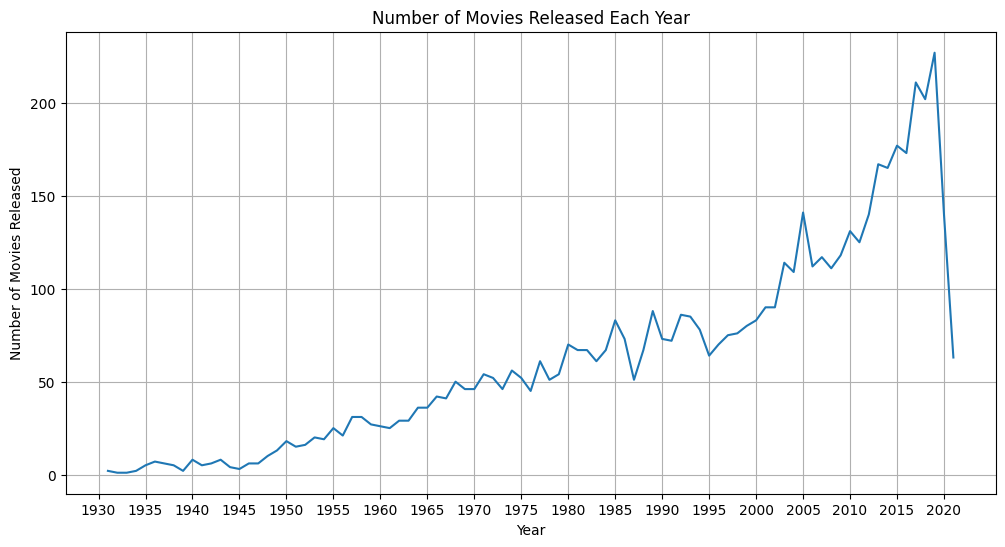

In [31]:
movies_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.grid(True) 
plt.xticks(np.arange(1930,2023,5))
plt.show()


In [32]:
mean_votes = df['Votes'].mean()
mean_votes

165.8005127010021

# Movies with rating greater than 8 and votes greater than mean of votes

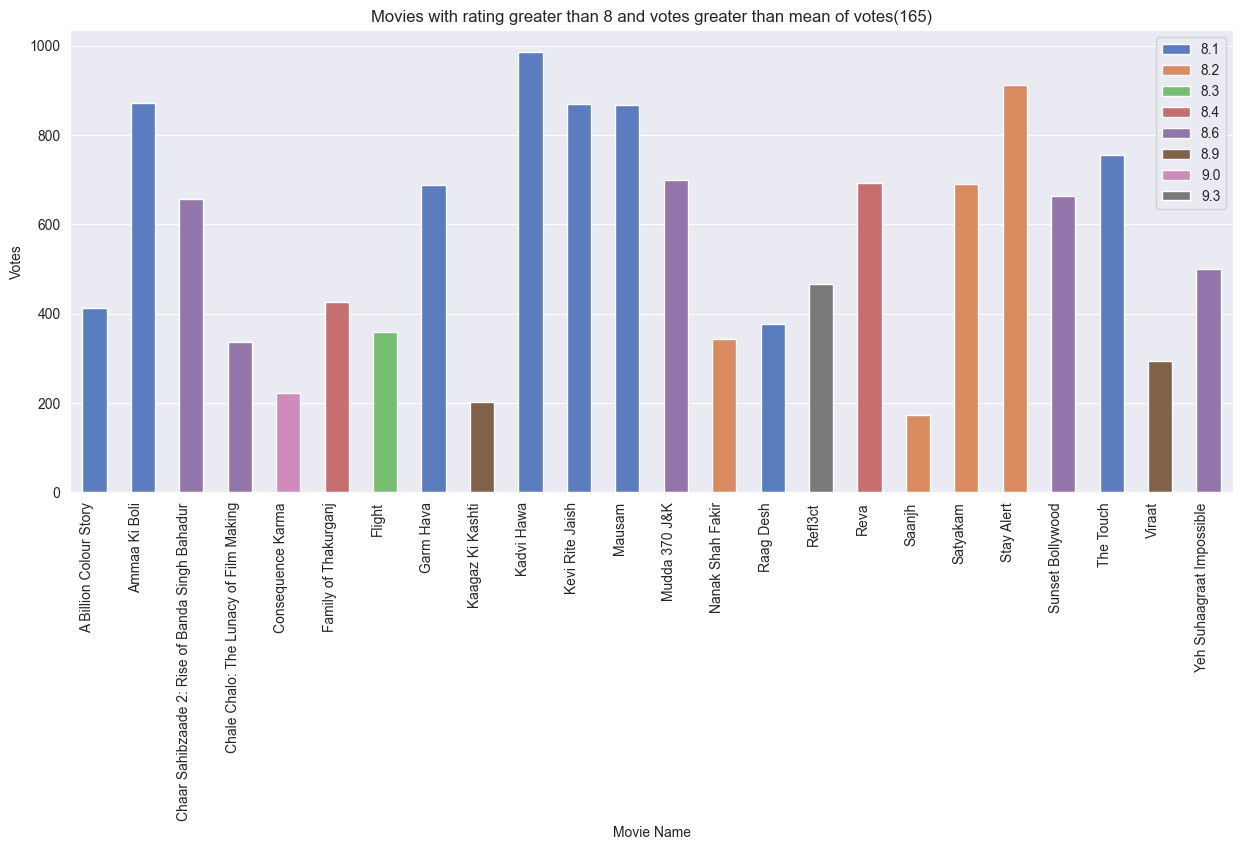

In [33]:
sns.set_style('darkgrid')
d = df.loc[(df['Rating']>8) & (df['Votes']>165), ['Rating','Votes','Name']]
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=d,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than mean of votes(165)')
plt.show()


# Average Movie Duration Per Year

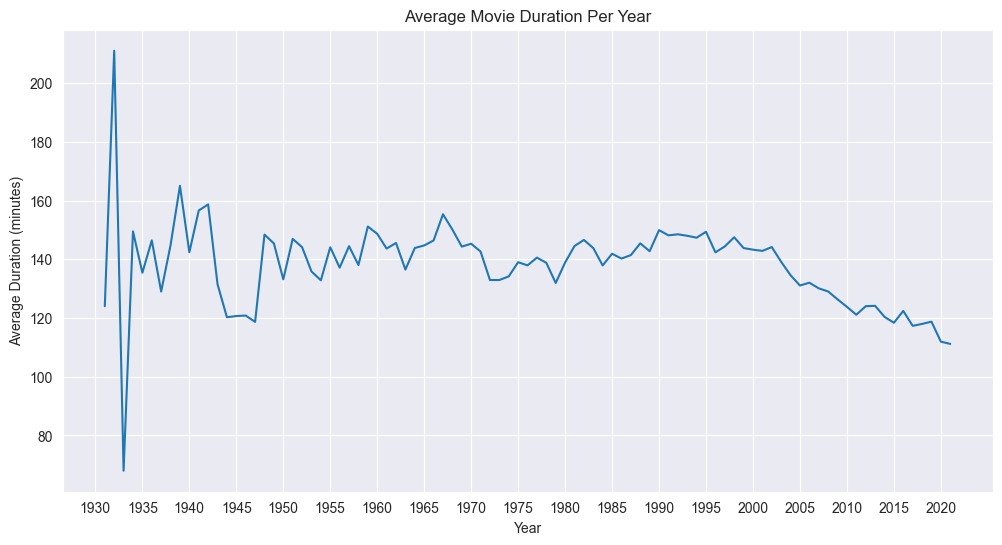

In [34]:
average_duration_per_year = df.groupby('Year')['Duration'].mean()
plt.figure(figsize=(12, 6))
plt.plot(average_duration_per_year.index, average_duration_per_year.values, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Movie Duration Per Year')
plt.grid(True)  
plt.xticks(np.arange(1930,2023,5))
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     4291 non-null   float64
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 442.1+ KB


# Number of Movies in Each Genre

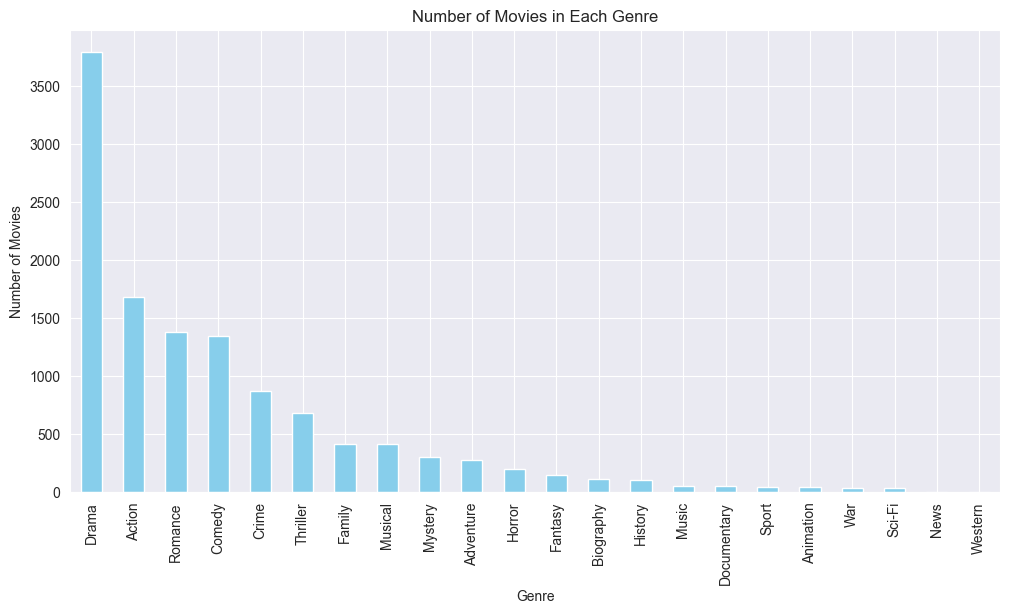

In [36]:
# Spliting the genre strings into individual genres
df['Genre'] = df['Genre'].str.split(', ')

# Creating a list to hold all genres
all_genres = []

# Extracting all genres from the DataFrame
for genres in df['Genre']:
    all_genres.extend(genres)

# Counting the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.xticks(rotation=90)  
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     4291 non-null   float64
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 442.1+ KB


In [38]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,[Drama],7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"[Comedy, Romance]",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"[Comedy, Drama, Musical]",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"[Drama, Romance, War]",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"[Horror, Mystery, Thriller]",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Top 20 Directors with the Most Movies

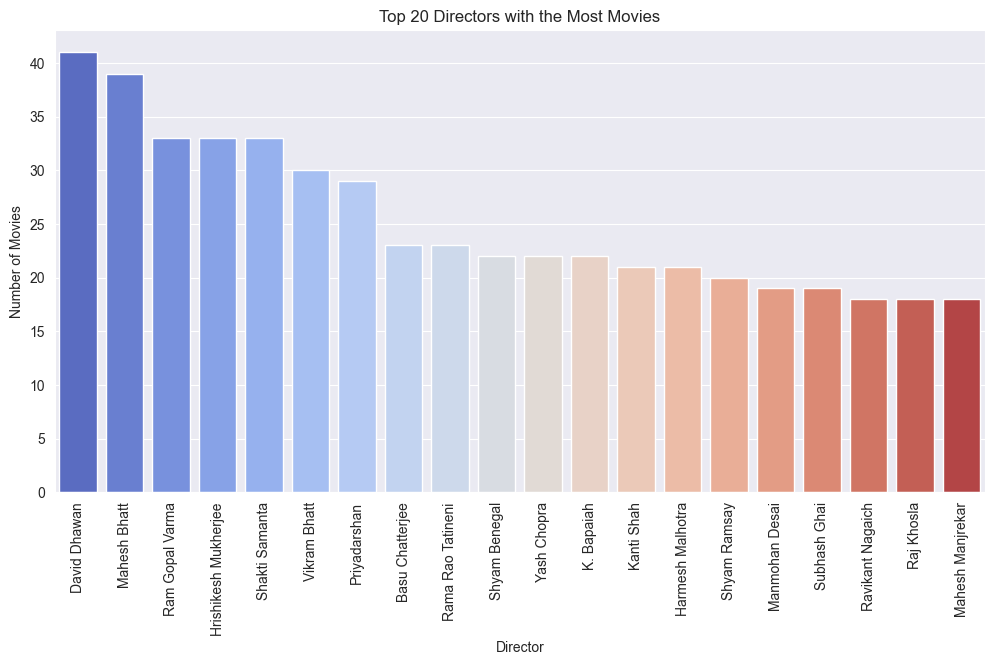

In [39]:
director_movie_counts = df['Director'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=director_movie_counts.index,y=director_movie_counts.values, palette='coolwarm')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 20 Directors with the Most Movies')
plt.xticks(rotation=90) 
plt.show()

# Top 20 Directors with the Highest Average Ratings

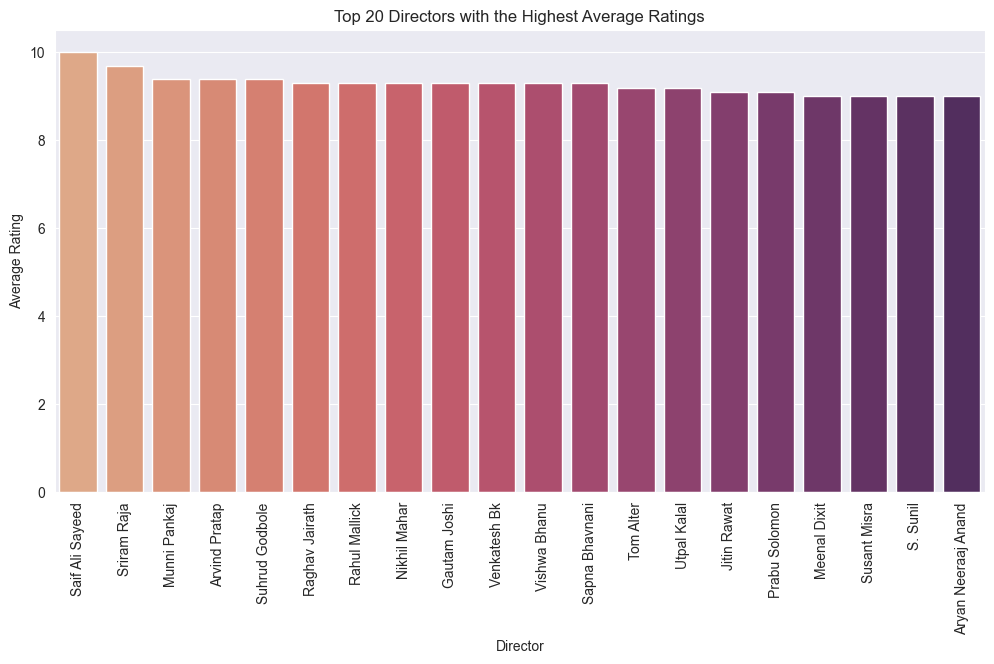

In [40]:
# Calculating the average rating for each director
director_avg_ratings = df.groupby('Director')['Rating'].mean().round(1)

# Sorting the directors by average rating in descending order and selecting the top 20
top_20_directors = director_avg_ratings.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_directors.index, y=top_20_directors.values, palette='flare')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 20 Directors with the Highest Average Ratings')
plt.xticks(rotation=90)  
plt.show()

# Top 20 Actors with the Most Movies

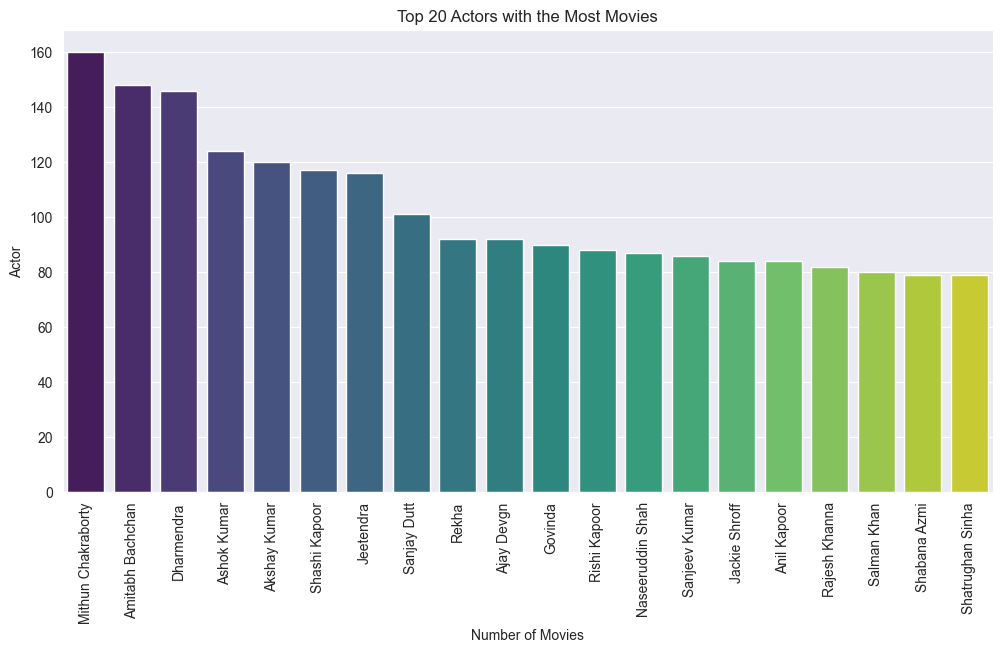

In [41]:
# Combining the three actor columns into a single Series
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)

# Counting the occurrences of each actor
actor_counts = all_actors.value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=actor_counts.index, y=actor_counts.values, palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 20 Actors with the Most Movies')
plt.xticks(rotation=90) 
plt.show()


# Top 20 Rated Actors

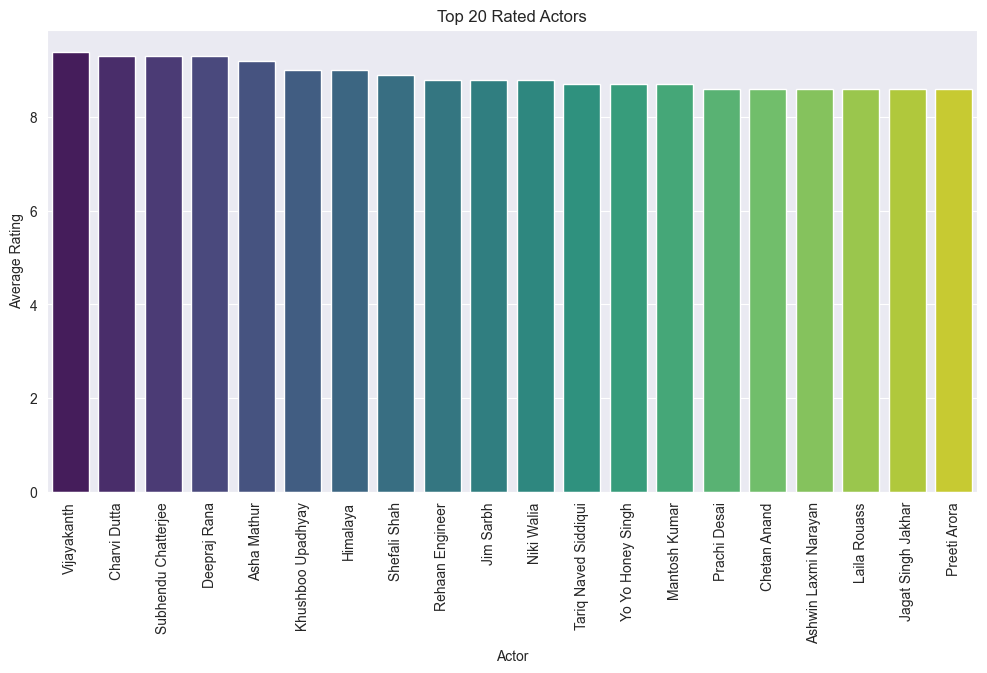

In [42]:
# Combining all actor columns into a single Series
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)

# Creating a DataFrame to store the actor and their average rating
actor_ratings = pd.DataFrame({
    'Actor': all_actors,
    'Average Rating': df['Rating']
})

# Grouping by actor and calculatng their average rating
actor_avg_ratings = actor_ratings.groupby('Actor')['Average Rating'].mean().round(1)

# Sort actors by average rating in descending order and selecing the top 20
top_20_rated_actors = actor_avg_ratings.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_rated_actors.index, y=top_20_rated_actors.values, palette='viridis')
plt.xlabel('Actor')
plt.ylabel('Average Rating')
plt.title('Top 20 Rated Actors')
plt.xticks(rotation=90)  
plt.show()

# Average Rating of the Top 20 Actors with the Most Movies

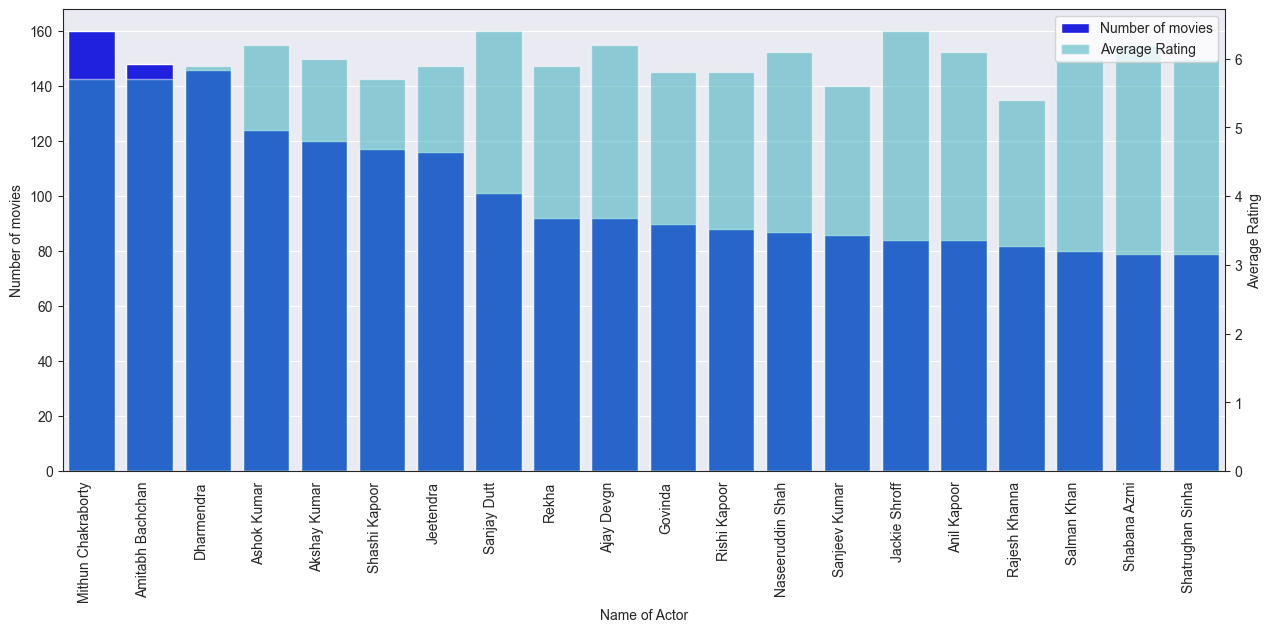

In [43]:
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)

# Creating a DataFrame to store the actor and their average rating
actor_ratings = pd.DataFrame({
    'Actor': all_actors,
    'Average Rating': df['Rating']
})

# Calculating the number of movies per actor
actor_counts = all_actors.value_counts().head(20)

# Grouping by actor and calculating their average rating
actor_avg_ratings = actor_ratings.groupby('Actor')['Average Rating'].mean().round(1)

# Sorting actors by the number of movies in descending order and selecting the top 20
top_20_actors = actor_counts.index

# Filtering the actor_avg_ratings DataFrame to include only the top 20 actors
top_20_actor_ratings = actor_avg_ratings[top_20_actors]

fig, ax1 = plt.subplots(figsize=(15, 6))
sns.set_style('white')
sns.barplot(x=top_20_actor_ratings.index, y=actor_counts.values, dodge=True, ax=ax1, label='Number of movies', color='blue')
ax1.set(xlabel='Name of Actor', ylabel='Number of movies')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax2 = ax1.twinx()
sns.barplot(x=top_20_actor_ratings.index, y=top_20_actor_ratings.values, dodge=True, ax=ax2, color='#17becf', label='Average Rating', alpha=0.5)
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

# Performing feature encoding

In [44]:
# Converting lists within the 'Genre' column to strings
df['Genre'] = df['Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

df = pd.get_dummies(df, columns=['Genre'], prefix='Genre')
df = pd.get_dummies(df, columns=['Name'], prefix='Name')
df = pd.get_dummies(df, columns=['Director'], prefix='Director')
df = pd.get_dummies(df, columns=['Actor 1'], prefix='Actor1')
df = pd.get_dummies(df, columns=['Actor 2'], prefix='Actor2')
df = pd.get_dummies(df, columns=['Actor 3'], prefix='Actor3')

# Model training and testing

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

X = df.drop(columns=['Rating'])  
y = df['Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imputing missing values in the features
imputer = SimpleImputer(strategy='mean') 
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Creating a Linear Regression model
linear_model = LinearRegression()

# Training the model on the training data
linear_model.fit(X_train_imputed, y_train)

# Making predictions on the test data
y_pred = linear_model.predict(X_test_imputed)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.505082470509542
R-squared: 0.17841829391024977
